In [45]:
!pip install mysql-connector-python

## Importing libraries

In [46]:
#importing matplot
import matplotlib.pyplot as plt 

#importing numpy
import numpy as np 

# Set plot space as inline for inline plots display
%matplotlib inline

# importing pandas into jupyter notebook
import pandas as pd

## Importing data from SQL database

In [47]:
#importing SQL connector
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [48]:
#importing Box office database
# box_m = pd.read_sql_query('select * from bom_movie_gross', con)
df = pd.read_sql_query("""
                         SELECT  title, studio, bom_movie_gross.domestic_gross, 
                                 foreign_gross, year, tconst, runtime_minutes, genres, 
                                 averagerating, numvotes, directors, writers, production_budget
                         FROM movies.bom_movie_gross
                         JOIN imdb_title_basics
                         ON title = primary_title
                         JOIN imdb_title_ratings
                         USING (tconst)
                         JOIN imdb_title_crew
                         USING (tconst)
                         JOIN tn_movie_budgets
                         ON title = movie;
                         """, con)

## Cleaning the dataset

In [49]:
# creating new database with split value columns
directors = df["directors"].str.split(",", n = 1, expand = True)
# making separate director columns from new data frame 
df["director1"]= directors[0] 
df["director2"]= directors[1]
# Dropping old directors columns 
df.drop(columns =["directors"], inplace = True)
# creating total gross column
df["total_gross"]= df['domestic_gross'] + df['foreign_gross']
# cleaning production budget into integers
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(int)
# creating ROI column
df["ROI"]= (df['total_gross'] / df['production_budget']) -1 
# removing empty cells
df['total_gross'].replace('', np.nan, inplace=True)
df.dropna(subset=['total_gross'], inplace=True)
# converting columns to integer
df['total_gross'] = df['total_gross'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['foreign_gross'] = df['foreign_gross'].astype(int)
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,runtime_minutes,genres,averagerating,numvotes,writers,production_budget,director1,director2,total_gross,ROI
0,Toy Story 3,BV,415000000,652000000,2010,tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,"nm0005124,nm0004056,nm0881279,nm1578335",200000000,nm0881279,None,1067000000,4.335000
1,Inception,WB,292600000,535700000,2010,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,160000000,nm0634240,None,828300000,4.176875
2,Shrek Forever After,P/DW,238700000,513900000,2010,tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,"nm0825308,nm0458441,nm0501359,nm0011470,nm0254...",165000000,nm0593610,None,752600000,3.561212
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,"nm0742279,nm2769412",68000000,nm1720541,None,698500000,9.272059
4,Iron Man 2,Par.,312400000,311500000,2010,tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,"nm0857620,nm0498278,nm1411347,nm1293367,nm0456158",170000000,nm0269463,None,623900000,2.670000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1471
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1264 non-null   object 
 1   studio             1264 non-null   object 
 2   domestic_gross     1264 non-null   int32  
 3   foreign_gross      1264 non-null   int32  
 4   year               1264 non-null   int64  
 5   tconst             1264 non-null   object 
 6   runtime_minutes    1233 non-null   float64
 7   genres             1264 non-null   object 
 8   averagerating      1264 non-null   float64
 9   numvotes           1264 non-null   int64  
 10  writers            1223 non-null   object 
 11  production_budget  1264 non-null   int32  
 12  director1          1264 non-null   object 
 13  director2          124 non-null    object 
 14  total_gross        1264 non-null   int32  
 15  ROI                1264 non-null   float64
dtypes: float64(3), int32(4),

In [58]:
mov_dir_ROI = df[df['genres'] == 'Horror'] 
mov_dir_ROI = mov_dir_ROI.groupby(['director1', 'genres']).mean().reset_index().head(10)
mov_dir_ROI['director1'].replace('', np.nan, inplace=True)
mov_dir_ROI.dropna(subset=['director1'], inplace=True)
mov_dir_ROI = mov_dir_ROI.sort_values(["ROI"], ascending = False)
mov_dir_ROI

,director1,genres,domestic_gross,foreign_gross,year,runtime_minutes,averagerating,numvotes,production_budget,total_gross,ROI
0,nm0068587,Horror,53300000,48500000,2012,83.0,4.2,33522,1000000,101800000,100.800000
4,nm0931095,Horror,84800000,92800000,2010,91.0,5.7,93122,3000000,177600000,58.200000
1,nm0118566,Horror,2300000,21900000,2013,83.0,4.6,77,8475000,24200000,12.493092
5,nm1156988,Horror,109800000,63800000,2015,77.0,6.6,12,37000000,173600000,3.691892
3,nm0702797,Horror,42600000,115300000,2011,92.0,5.9,98061,40000000,157900000,2.947500
2,nm0687427,Horror,11100000,7100000,2018,89.0,5.5,8662,5500000,18200000,2.309091
7,nm1266897,Horror,3000000,11300000,2016,96.0,5.3,15813,5000000,14300000,1.860000
9,nm3456466,Horror,60000000,52400000,2010,86.0,2.6,64,48000000,112400000,1.341667
6,nm1206844,Horror,42100000,24400000,2012,95.0,7.0,338445,30000000,66500000,1.216667
8,nm2934181,Horror,30400000,4500000,2011,97.0,4.0,250,25000000,34900000,0.396000


In [57]:
mov_dir = df[df['genres'] == 'Horror'] 
mov_dir = mov_dir.groupby(['director1', 'genres']).mean().reset_index().head(10)
mov_dir['director1'].replace('', np.nan, inplace=True)
mov_dir.dropna(subset=['director1'], inplace=True)
mov_dir = mov_dir.sort_values(["averagerating"], ascending = False)
mov_dir

,director1,genres,domestic_gross,foreign_gross,year,runtime_minutes,averagerating,numvotes,production_budget,total_gross,ROI
6,nm1206844,Horror,42100000,24400000,2012,95.0,7.0,338445,30000000,66500000,1.216667
5,nm1156988,Horror,109800000,63800000,2015,77.0,6.6,12,37000000,173600000,3.691892
3,nm0702797,Horror,42600000,115300000,2011,92.0,5.9,98061,40000000,157900000,2.947500
4,nm0931095,Horror,84800000,92800000,2010,91.0,5.7,93122,3000000,177600000,58.200000
2,nm0687427,Horror,11100000,7100000,2018,89.0,5.5,8662,5500000,18200000,2.309091
7,nm1266897,Horror,3000000,11300000,2016,96.0,5.3,15813,5000000,14300000,1.860000
1,nm0118566,Horror,2300000,21900000,2013,83.0,4.6,77,8475000,24200000,12.493092
0,nm0068587,Horror,53300000,48500000,2012,83.0,4.2,33522,1000000,101800000,100.800000
8,nm2934181,Horror,30400000,4500000,2011,97.0,4.0,250,25000000,34900000,0.396000
9,nm3456466,Horror,60000000,52400000,2010,86.0,2.6,64,48000000,112400000,1.341667


<BarContainer object of 10 artists>

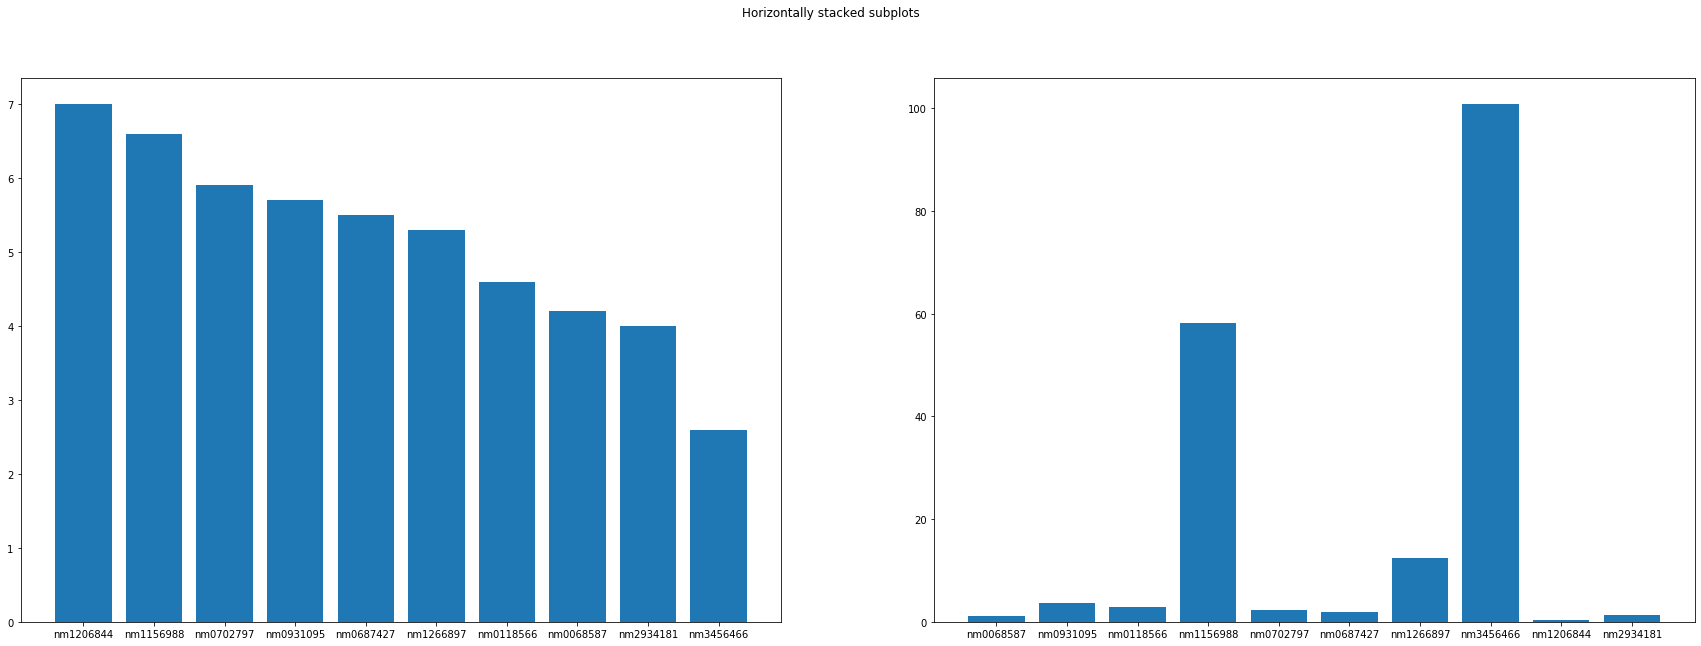

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Horizontally stacked subplots')
ax1.bar(mov_dir['director1'], mov_dir['averagerating'])
ax2.bar(mov_dir_ROI['director1'], mov_dir['ROI'])

In [60]:
# # mov_dir = df[df['genres'] == 'Drama'] 
# mov_dir = mov_dir.groupby(['director1', 'genres']).mean().reset_index().head(10)
# mov_dir['director1'].replace('', np.nan, inplace=True)
# mov_dir.dropna(subset=['director1'], inplace=True)
# mov_dir = mov_dir.sort_values(["ROI", "averagerating"], ascending = (False, False))
# mov_dir

,director1,genres,domestic_gross,foreign_gross,year,runtime_minutes,averagerating,numvotes,production_budget,total_gross,ROI
0,nm0068587,Horror,53300000,48500000,2012,83.0,4.2,33522,1000000,101800000,100.800000
4,nm0931095,Horror,84800000,92800000,2010,91.0,5.7,93122,3000000,177600000,58.200000
1,nm0118566,Horror,2300000,21900000,2013,83.0,4.6,77,8475000,24200000,12.493092
5,nm1156988,Horror,109800000,63800000,2015,77.0,6.6,12,37000000,173600000,3.691892
3,nm0702797,Horror,42600000,115300000,2011,92.0,5.9,98061,40000000,157900000,2.947500
2,nm0687427,Horror,11100000,7100000,2018,89.0,5.5,8662,5500000,18200000,2.309091
7,nm1266897,Horror,3000000,11300000,2016,96.0,5.3,15813,5000000,14300000,1.860000
9,nm3456466,Horror,60000000,52400000,2010,86.0,2.6,64,48000000,112400000,1.341667
6,nm1206844,Horror,42100000,24400000,2012,95.0,7.0,338445,30000000,66500000,1.216667
8,nm2934181,Horror,30400000,4500000,2011,97.0,4.0,250,25000000,34900000,0.396000


In [44]:
c = df.genres.value_counts()
countzz = pd.DataFrame(c)
countzz

,genres
Drama,69
"Adventure,Animation,Comedy",61
"Action,Adventure,Sci-Fi",45
"Comedy,Drama",43
Comedy,39
...,...
Sci-Fi,1
"Adventure,Mystery,Sci-Fi",1
"Comedy,Drama,Musical",1
"Horror,Romance,Thriller",1
